# Proyecto 6

Proyecto 6 de ANTC. En este caso, buscamos simular la difusión de un objeto dentro de una superficie cuadrada de longitud $L$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=True, figsize=(10, 10))

Creamos dos funciones. Una de ellas nos calcula el cuadrado para la grafica (esta denotado por una longitud L, que posteriormente decidiremos). 

La otra función, se encarga de calcular la distancia entre los puntos $x_n,y_n$ y $x_{n-1},y_{n-1}$.

In [2]:
def cuadrado(L):
    #Vertices del cuadrado.
    xt=np.zeros(5)
    yt=np.zeros(5)
    xt[0]=-L;xt[1]=L;xt[2]=L;xt[3]=-L;xt[4]=xt[0]
    yt[0]=-L;yt[1]=-L;yt[2]=L;yt[3]=L;yt[4]=yt[0]
    return xt,yt
def distancia(x,y,i):
    return np.sqrt((x[i]-x[i-1])**2+(y[i]-y[i-1])**2)

Ahora si, la siguiente función es la encargada de generar el algoritmo de Monte Carlo para la difusión de una sustancia en una pequeña malla. En este caso, tratamos una gota de agua difundiendose en una hoja cuadrada.

Nuestra gota, para difundirse, tiene la opción de moverse una unidad alrededor (como si de ajedrez fuera). En este caso, la difusión se genera un total máximo de $N$ veces, pero puede ser menos debido a que si en una opción, nuestra gota llega al limite de la caja, el procedimiento se termina en ese movimiento.

In [3]:
def monte_carlo(N,L):
    x=np.zeros(N);y=np.zeros(N)
    D=L
    x[0]=0
    y[0]=0 #El punto inicial.
    #El ciclo while para las N iteraciones
    i=1
    while (i<=(N-1)):
    #for i in range(1,N-1):
        #Se escoge aleatoriamente una celda anterior.
        num=random.randint(0,i-1)
        #Se escoge aleatoriamente una de las 8 posibilidades.
        mx=random.randint(-1,1) 
        my=random.randint(-1,1)
        #Nos aseguramos de descartar que se quede donde mismo.
        while (mx==my==0):
            mx=random.randint(-1,1)
            my=random.randint(-1,1)
        #Ahora, creamos la nueva posicion que es x[i] y y[i].
        x[i]=x[num]+mx;y[i]=y[num]+my
        #Calculamos la distancia con la funcion distancia.
        d=distancia(x,y,i)
        if (d>D): #Comprobamos que la distancia sea aceptable.
            x[i]=x[i-1]; y[i]=y[i-1]
        if ((-L/2)<x[i]<(L/2)):
            if ((-L/2)<y[i]<(L/2)):
                i+=1
        else:
            i=N-1
    return x,y

Aqui colocamos una función que grafique nuestros valores, y tambien una función que los escriba en un txt.

In [4]:
def graf(x,y,L):
    xt,yt=cuadrado(L/2)
    plt.figure()
    sns.scatterplot(x,y)
    plt.plot(xt,yt,'r',lw=3)
    plt.show()
def txt(x,y,N):
    t1=open("difusion.txt","w")

    for i in range(0,N-1):
        t1.write(str(x[i])); t1.write(" "); t1.write(str(y[i]))
        t1.write("\n")

    t1.close()

Ahora, comprobaremos el funcionamiento del código.

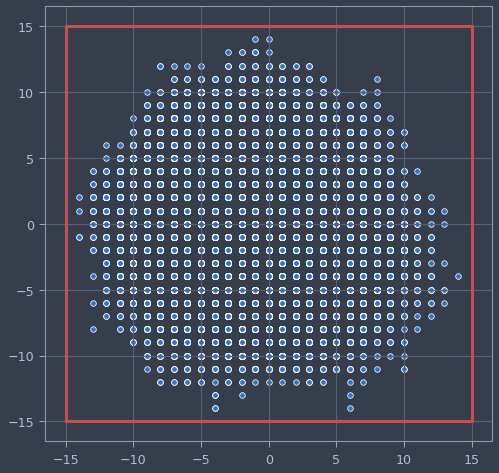

In [5]:
N=1000000 #Debe terminar en 1, para que el código funcione.
L=30

x,y=monte_carlo(N,L)
grafica=graf(x,y,L)
#archivo=txt(x,y,N)